In [5]:
# !pip install pyspark

In [8]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Customers').getOrCreate()

In [11]:
from pyspark.ml.regression import LinearRegression

In [12]:
dataset = spark.read.csv("Ecommerce Customers.csv", inferSchema=True, header=True)

In [10]:
dataset.show()

+--------------------+--------------------+------------------+-------------------+------------------+------------------+--------------------+-------------------+
|               Email|             Address|            Avatar|Avg. Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+------------------+-------------------+------------------+------------------+--------------------+-------------------+
|mstephenson@ferna...|    835 Frank Tunnel|              null|               null|              null|              null|                null|               null|
|         Wrightmouth|      MI 82180-9605"|            Violet|  34.49726772511229|12.655651149166752| 39.57766801952616|   4.082620632952961|  587.9510539684005|
|   hduke@hotmail.com|  4547 Archer Common|              null|               null|              null|              null|                null|               null|
|         Diazchester|      

In [13]:
dataset

DataFrame[Email: string, Address: string, Avatar: string, Avg. Session Length: double, Time on App: double, Time on Website: double, Length of Membership: double, Yearly Amount Spent: double]

In [15]:
dataset.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg. Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [22]:
updated_df = dataset.withColumnRenamed("Avg. Session Length", "Avg Session Length")

In [24]:
updated_df.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [16]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

In [29]:
featureassembler = VectorAssembler(inputCols=['Avg Session Length','Time on App','Time on Website','Length of Membership'],outputCol="Independent Feature",handleInvalid="skip")

In [30]:
output = featureassembler.transform(updated_df)

In [31]:
output

DataFrame[Email: string, Address: string, Avatar: string, Avg Session Length: double, Time on App: double, Time on Website: double, Length of Membership: double, Yearly Amount Spent: double, Independent Feature: vector]

In [32]:
output.show()

+------------------+---------------+------------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+
|             Email|        Address|            Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent| Independent Feature|
+------------------+---------------+------------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+
|       Wrightmouth| MI 82180-9605"|            Violet| 34.49726772511229|12.655651149166752| 39.57766801952616|   4.082620632952961|  587.9510539684005|[34.4972677251122...|
|       Diazchester| CA 06566-8576"|         DarkGreen|31.926272026360156|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|[31.9262720263601...|
|       Cobbborough| DC 99414-7564"|            Bisque|33.000914755642675|11.330278057777512| 37.11059744212085|   4.10454320

In [35]:
output.select("Independent Feature").show()

+--------------------+
| Independent Feature|
+--------------------+
|[34.4972677251122...|
|[31.9262720263601...|
|[33.0009147556426...|
|[34.3055566297555...|
|[33.3306725236463...|
|[33.8710378793419...|
|[32.0215955013870...|
|[12.3519589730029...|
|[33.9877728956856...|
|[11.8141282949721...|
|[33.9925727749537...|
|[11.5847829995352...|
|[29.5324289670579...|
|[33.1903340437226...|
|[32.3879758531538...|
|[30.7377203726281...|
|[32.1253868972878...|
|[32.3388993230671...|
|[32.1878120459321...|
|[32.6178560628234...|
+--------------------+
only showing top 20 rows



In [36]:
output.columns

['Email',
 'Address',
 'Avatar',
 'Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent',
 'Independent Feature']

In [37]:
finalized_data = output.select("Independent Feature", "Yearly Amount Spent")

In [39]:
finalized_data.show()

+--------------------+-------------------+
| Independent Feature|Yearly Amount Spent|
+--------------------+-------------------+
|[34.4972677251122...|  587.9510539684005|
|[31.9262720263601...|  392.2049334443264|
|[33.0009147556426...| 487.54750486747207|
|[34.3055566297555...|  581.8523440352178|
|[33.3306725236463...|  599.4060920457634|
|[33.8710378793419...|   637.102447915074|
|[32.0215955013870...|  521.5721747578274|
|[12.3519589730029...|               null|
|[33.9877728956856...|  570.2004089636195|
|[11.8141282949721...|               null|
|[33.9925727749537...|  492.6060127179966|
|[11.5847829995352...|               null|
|[29.5324289670579...| 408.64035107262754|
|[33.1903340437226...|  573.4158673313865|
|[32.3879758531538...| 470.45273330095546|
|[30.7377203726281...|  461.7807421962299|
|[32.1253868972878...| 457.84769594494855|
|[32.3388993230671...|  407.7045475495441|
|[32.1878120459321...| 452.31567548003545|
|[32.6178560628234...|   605.061038804892|
+----------

In [44]:
finalized_data = finalized_data.na.drop()

In [45]:
finalized_data.show()

+--------------------+-------------------+
| Independent Feature|Yearly Amount Spent|
+--------------------+-------------------+
|[34.4972677251122...|  587.9510539684005|
|[31.9262720263601...|  392.2049334443264|
|[33.0009147556426...| 487.54750486747207|
|[34.3055566297555...|  581.8523440352178|
|[33.3306725236463...|  599.4060920457634|
|[33.8710378793419...|   637.102447915074|
|[32.0215955013870...|  521.5721747578274|
|[33.9877728956856...|  570.2004089636195|
|[33.9925727749537...|  492.6060127179966|
|[29.5324289670579...| 408.64035107262754|
|[33.1903340437226...|  573.4158673313865|
|[32.3879758531538...| 470.45273330095546|
|[30.7377203726281...|  461.7807421962299|
|[32.1253868972878...| 457.84769594494855|
|[32.3388993230671...|  407.7045475495441|
|[32.1878120459321...| 452.31567548003545|
|[32.6178560628234...|   605.061038804892|
|[32.9127851111597...|  534.7057438060227|
|[34.5075509985266...|  700.9170916173961|
|[33.0293319535068...| 423.17999168059777|
+----------

In [46]:
train_data, test_data = finalized_data.randomSplit([0.75, 0.25])

In [47]:
regressor = LinearRegression(featuresCol="Independent Feature", labelCol="Yearly Amount Spent")
regressor = regressor.fit(train_data)

23/09/07 12:55:35 WARN Instrumentation: [892954a7] regParam is zero, which might cause numerical instability and overfitting.


In [48]:
regressor.coefficients

DenseVector([25.6838, 38.3234, 1.0659, 61.666])

In [49]:
regressor.intercept

-1068.8542932158657

In [51]:
pred_results = regressor.evaluate(test_data)

In [53]:
pred_results.predictions.show()

+--------------------+-------------------+------------------+
| Independent Feature|Yearly Amount Spent|        prediction|
+--------------------+-------------------+------------------+
|[30.3931845423455...|  319.9288698031936|331.30075087075807|
|[30.7377203726281...|  461.7807421962299| 450.5526861319904|
|[31.0662181616375...|  448.9332932076743| 461.9158875907392|
|[31.4474464941278...|   418.602742095224|  427.876485627414|
|[31.5261978982398...| 409.09452619233787| 419.1292860310584|
|[31.6548096756927...| 475.26342372754846| 468.8294337384766|
|[31.6739155032749...|  475.7250679098812| 502.2497869070328|
|[31.7216523605090...|  347.7769266318726| 349.4819196337919|
|[31.8093003166791...|  536.7718993628412| 547.8969955346695|
|[31.8512531286083...| 472.99224666679834| 464.0168625036497|
|[31.8648325480987...|  439.8912804768136|449.66274635166656|
|[31.8745516945853...|  392.2852442462675| 398.8143845454649|
|[31.9673209478824...| 445.74984123965226| 451.8673299654947|
|[32.021

In [57]:
Predicted_results = pred_results.predictions

In [59]:
Predicted_results.show()

+--------------------+-------------------+------------------+
| Independent Feature|Yearly Amount Spent|        prediction|
+--------------------+-------------------+------------------+
|[30.3931845423455...|  319.9288698031936|331.30075087075807|
|[30.7377203726281...|  461.7807421962299| 450.5526861319904|
|[31.0662181616375...|  448.9332932076743| 461.9158875907392|
|[31.4474464941278...|   418.602742095224|  427.876485627414|
|[31.5261978982398...| 409.09452619233787| 419.1292860310584|
|[31.6548096756927...| 475.26342372754846| 468.8294337384766|
|[31.6739155032749...|  475.7250679098812| 502.2497869070328|
|[31.7216523605090...|  347.7769266318726| 349.4819196337919|
|[31.8093003166791...|  536.7718993628412| 547.8969955346695|
|[31.8512531286083...| 472.99224666679834| 464.0168625036497|
|[31.8648325480987...|  439.8912804768136|449.66274635166656|
|[31.8745516945853...|  392.2852442462675| 398.8143845454649|
|[31.9673209478824...| 445.74984123965226| 451.8673299654947|
|[32.021

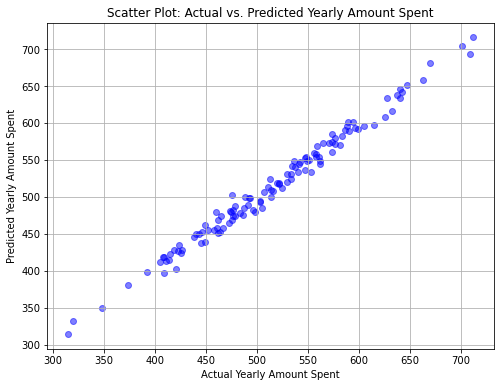

In [60]:
import matplotlib.pyplot as plt

# Extract the actual Yearly Amount Spent and predicted values from Predicted_results
actual_values = Predicted_results.select("Yearly Amount Spent").rdd.flatMap(lambda x: x).collect()
predicted_values = Predicted_results.select("prediction").rdd.flatMap(lambda x: x).collect()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Scatter Plot: Actual vs. Predicted Yearly Amount Spent')
plt.grid(True)
plt.show()

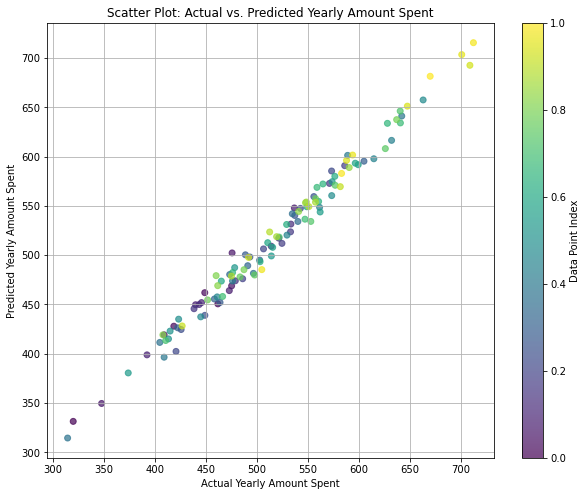

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the actual Yearly Amount Spent and predicted values from finalized_data
actual_values = Predicted_results.select("Yearly Amount Spent").rdd.flatMap(lambda x: x).collect()
predicted_values = Predicted_results.select("prediction").rdd.flatMap(lambda x: x).collect()

# Create an array of indices for each data point
indices = np.arange(len(actual_values))

# Create a colormap for coloring data points
colors = plt.cm.viridis(np.linspace(0, 1, len(actual_values)))

# Create a scatter plot with different colors for each data point
plt.figure(figsize=(10, 8))
plt.scatter(actual_values, predicted_values, c=colors, alpha=0.7)
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Scatter Plot: Actual vs. Predicted Yearly Amount Spent')
plt.colorbar(label='Data Point Index')
plt.grid(True)
plt.show()


# Mean Absolute Error (MAE): 

In [63]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="Yearly Amount Spent", predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(Predicted_results)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 7.47528849298443


# Mean Squared Error (MSE):

In [64]:
evaluator = RegressionEvaluator(labelCol="Yearly Amount Spent", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(Predicted_results)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 83.13284070636763


# Root Mean Squared Error (RMSE): 

In [65]:
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 9.117721245265598


# R-squared (R²) or Coefficient of Determination: 

In [66]:
r2 = evaluator.evaluate(Predicted_results, {evaluator.metricName: "r2"})
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.986708572224543


In [71]:
Predicted_results.count()

119

In [92]:
# Predicted_results.show(Predicted_results.count(),truncate=False)

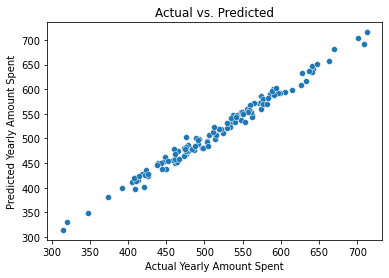

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Convert the PySpark DataFrame to a Pandas DataFrame
predicted_results_pd = Predicted_results.toPandas()

# Scatterplot
sns.scatterplot(data=predicted_results_pd, x='Yearly Amount Spent', y='prediction')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs. Predicted')
plt.show()

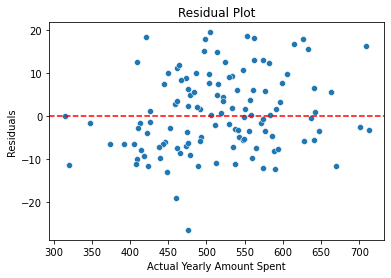

In [77]:
# Residual Plot
predicted_results_pd['Residuals'] = predicted_results_pd['Yearly Amount Spent'] - predicted_results_pd['prediction']
sns.scatterplot(data=predicted_results_pd, x='Yearly Amount Spent', y='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

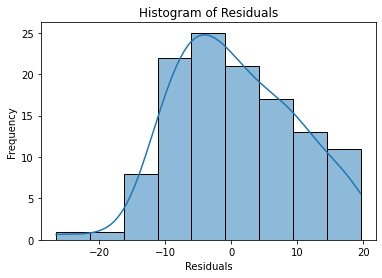

In [78]:
# Histogram of Residuals
sns.histplot(predicted_results_pd['Residuals'], kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

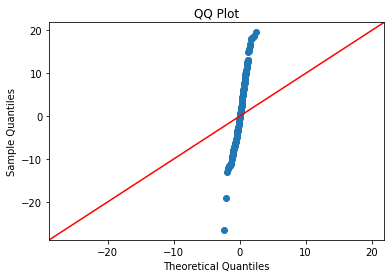

In [83]:
# QQ Plot (Quantile-Quantile Plot)
sm.qqplot(predicted_results_pd['Residuals'], line='45')
plt.title('QQ Plot')
plt.show()

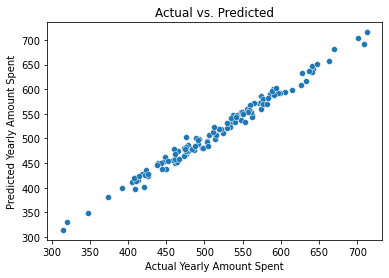

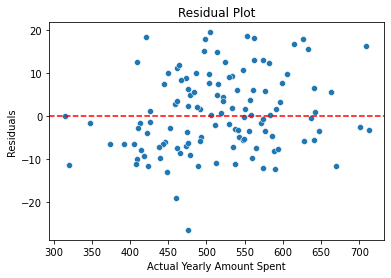

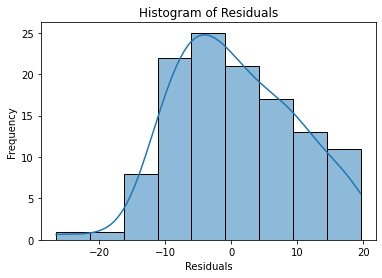

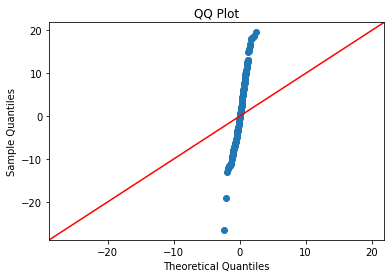

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Convert the PySpark DataFrame to a Pandas DataFrame
predicted_results_pd = Predicted_results.toPandas()

# Scatterplot
sns.scatterplot(data=predicted_results_pd, x='Yearly Amount Spent', y='prediction')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs. Predicted')
plt.show()

# Residual Plot
predicted_results_pd['Residuals'] = predicted_results_pd['Yearly Amount Spent'] - predicted_results_pd['prediction']
sns.scatterplot(data=predicted_results_pd, x='Yearly Amount Spent', y='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Histogram of Residuals
sns.histplot(predicted_results_pd['Residuals'], kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# QQ Plot (Quantile-Quantile Plot)
sm.qqplot(predicted_results_pd['Residuals'], line='45')
plt.title('QQ Plot')
plt.show()

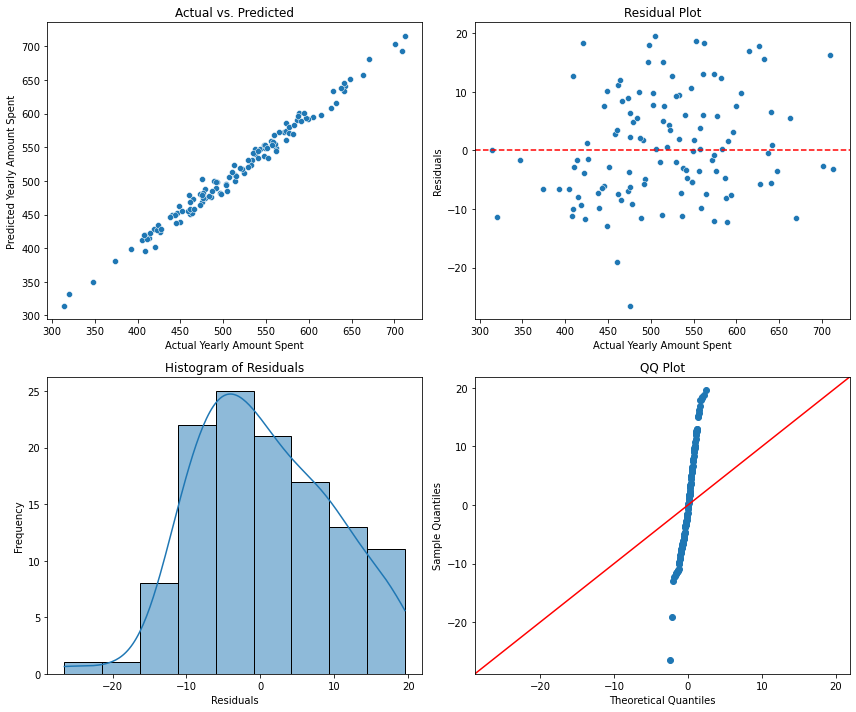

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Convert the PySpark DataFrame to a Pandas DataFrame
predicted_results_pd = Predicted_results.toPandas()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Scatterplot for Actual vs. Predicted
sns.scatterplot(data=predicted_results_pd, x='Yearly Amount Spent', y='prediction', ax=axes.flat[0])
axes.flat[0].set_xlabel('Actual Yearly Amount Spent')
axes.flat[0].set_ylabel('Predicted Yearly Amount Spent')
axes.flat[0].set_title('Actual vs. Predicted')

# Residual Plot
predicted_results_pd['Residuals'] = predicted_results_pd['Yearly Amount Spent'] - predicted_results_pd['prediction']
sns.scatterplot(data=predicted_results_pd, x='Yearly Amount Spent', y='Residuals', ax=axes.flat[1])
axes.flat[1].axhline(0, color='red', linestyle='--')
axes.flat[1].set_xlabel('Actual Yearly Amount Spent')
axes.flat[1].set_ylabel('Residuals')
axes.flat[1].set_title('Residual Plot')

# Histogram of Residuals
sns.histplot(predicted_results_pd['Residuals'], kde=True, ax=axes.flat[2])
axes.flat[2].set_xlabel('Residuals')
axes.flat[2].set_ylabel('Frequency')
axes.flat[2].set_title('Histogram of Residuals')

# QQ Plot (Quantile-Quantile Plot)
sm.qqplot(predicted_results_pd['Residuals'], line='45', ax=axes.flat[3])
axes.flat[3].set_title('QQ Plot')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()
